# Get population LAC

In [1]:
#!pip install h3
import json
import branca.colormap as cm
from geojson import Feature, Point, FeatureCollection
from geopandas.tools import sjoin
from h3 import geo_to_h3, h3_to_geo_boundary
from shapely.geometry import Polygon
import seaborn as sns

from utils_spatial import *

In [2]:
countries = pd.read_excel(scldatalake + 'Manuals and Standards/IADB country and area codes for statistical use/IADB_country_codes_admin_0.xlsx', engine='openpyxl')
countries = countries[~(countries.iadb_region_code.isna())]
countries = np.unique(countries.isoalpha3)
countries

array(['ARG', 'BHS', 'BLZ', 'BOL', 'BRA', 'BRB', 'CHL', 'COL', 'CRI',
       'DOM', 'ECU', 'GTM', 'GUY', 'HND', 'HTI', 'JAM', 'MEX', 'NIC',
       'PAN', 'PER', 'PRY', 'SLV', 'SUR', 'TTO', 'URY', 'VEN'],
      dtype=object)

In [ ]:
# Population of interest
###########################
population_='women_of_reproductive_age_15_49'
LAC_concat = []
resolution = 8

for isoalpha3 in countries:
    gdf = get_hex_isoalpha(scldatalake, population_, resolution, isoalpha3)
    LAC_concat.append(gdf)

gdp_concat = gpd.GeoDataFrame(pd.concat( LAC_concat, ignore_index=True))
gdp_concat = gdp_concat[['hex_id', 'population', 'isoalpha3', 'population_type', 'geometry']]

In [ ]:
gdp_concat.to_file(f"../data/{population_}_{resolution}.geojson", driver='GeoJSON')

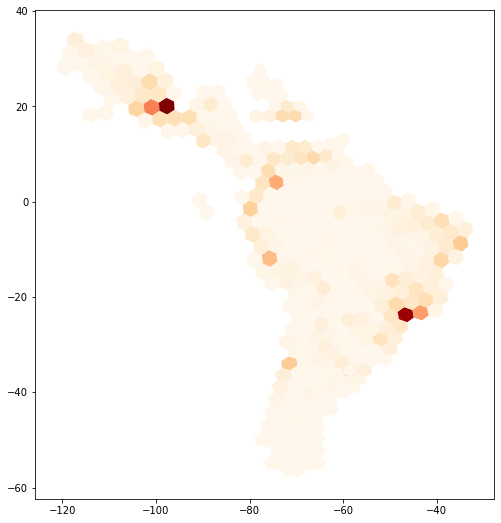

In [50]:
gdp_concat.plot( figsize=(9, 9), column='population', cmap='OrRd');